<a href="https://colab.research.google.com/github/rabrn/meus_projetos/blob/main/Analisando_os_Dados_do_Airbnb_em_Paris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/france/ile-de-france/paris/2024-06-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificador único do anúncio
* `name` - nome do anúncio
* `host_id` - identificador do anfitrião
* `host_name` - nome do anfitrião
* `neighbourhood_group` - não utilizado (todos os valores são NaN)
* `neighbourhood` - bairro da hospedagem
* `latitude` - latitude da localização da hospedagem
* `longitude` - longitude da localização da hospedagem
* `room_type` - tipos de hospedagem (*entire place*, *private room*, ou *shared room*)
* `price` - valor da diária na moeda local
* `minimum_nights` - número mínimo de noites exigido para estadia
* `number_of_reviews` - número de avaliações que o anúncio possui
* `last_review` - data da última avaliação do anúncio
* `reviews_per_month` - número médio de avaliações mensais que o anúncio possui desde que foi postado
* `calculated_host_listings_count`- número de anúncios que o anfitrião tem na mesma cidade/região
* `number_of_reviews_ltm` - número de avaliações nos últimos 12 meses
* `availability_365` - disponibilidade da hospedagem nos próximos 365 dias
* `license` -  número de registro da licença/autorização

Fonte: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7241227,Appartement F2 de 50m2,23740469,Marie Josee,NaN,Buttes-Montmartre,48.889930,2.366960,Entire home/apt,NaN,365,2,2018-08-25,0.03,1,0,0,NaN
1,738818740125140768,Studette calme paris,33108376,Kaïs,NaN,Passy,48.852160,2.262300,Entire home/apt,NaN,4,6,2023-09-26,0.30,1,0,2,7511607442416
2,6640639,Chambre de Bonne,34756427,Ricardo,NaN,Vaugirard,48.831000,2.289190,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
3,8387171,Faidherbe Chaligny Square,44188365,Benoit,NaN,Reuilly,48.848980,2.386090,Entire home/apt,NaN,365,0,NaN,NaN,1,0,0,NaN
4,1097932353733680407,Beau studio au cœur de Barbès,514983472,Rebaia,NaN,Buttes-Montmartre,48.886598,2.359753,Entire home/apt,NaN,1,2,2024-04-07,0.59,1,0,2,7511808567461


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

Entradas:	 95885
Variáveis:	 18


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending = False) / df.shape[0]

,0
neighbourhood_group,1.000000
reviews_per_month,0.335694
last_review,0.335694
price,0.222204
license,0.206988
host_name,0.000083
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000


Como `neighbourhood_group` é NaN em 100% dos casos, podemos eliminar essa variável.

In [7]:
df.drop('neighbourhood_group', axis=1, inplace=True)
df.isnull().sum().sort_values(ascending = False) / df.shape[0]

,0
last_review,0.335694
reviews_per_month,0.335694
price,0.222204
license,0.206988
host_name,0.000083
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
name,0.000000


### **Q3. Qual o tipo de distribuição das variáveis?**

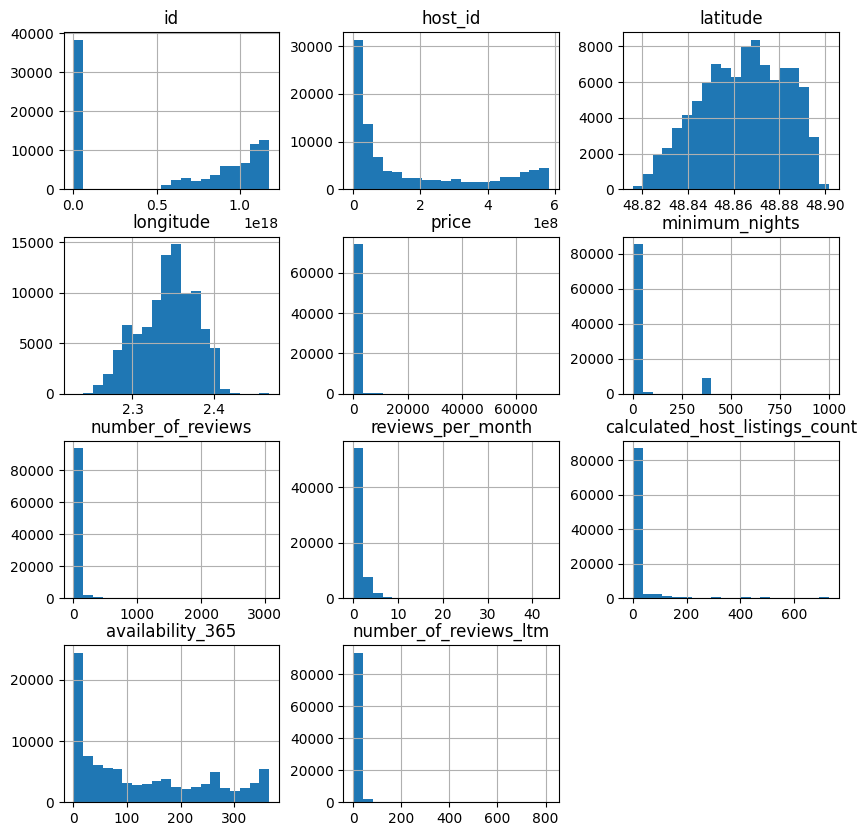

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20,figsize=(10,10));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price``
print("O preço médio da diária em Paris é de €{:.2f}.".format(df.price.mean()))

O preço médio da diária em Paris é de €289.08.


### **Q4. Qual a correlação existente entre as variáveis**

In [10]:
# retirar as colunas com id e host_id
df_sem_id = df.drop(['id', 'host_id'], axis=1)
# criar uma matriz de correlação
matriz_corr = df_sem_id.corr(method="pearson",numeric_only=True)
# mostrar a matriz de correlação
display(matriz_corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
latitude,1.000000,0.098102,-0.007100,0.003615,-0.013350,-0.024813,-0.010366,-0.018564,-0.007377
longitude,0.098102,1.000000,-0.101529,0.002025,0.021820,-0.033449,-0.092750,-0.094249,0.016280
price,-0.007100,-0.101529,1.000000,-0.026781,-0.048556,-0.038962,0.005492,0.024911,-0.067859
minimum_nights,0.003615,0.002025,-0.026781,1.000000,-0.091255,-0.232677,-0.040534,-0.218028,-0.160028
number_of_reviews,-0.013350,0.021820,-0.048556,-0.091255,1.000000,0.502671,-0.042556,0.082354,0.695774
reviews_per_month,-0.024813,-0.033449,-0.038962,-0.232677,0.502671,1.000000,-0.003846,0.188880,0.754638
calculated_host_listings_count,-0.010366,-0.092750,0.005492,-0.040534,-0.042556,-0.003846,1.000000,0.138824,-0.028222
availability_365,-0.018564,-0.094249,0.024911,-0.218028,0.082354,0.188880,0.138824,1.000000,0.134751
number_of_reviews_ltm,-0.007377,0.016280,-0.067859,-0.160028,0.695774,0.754638,-0.028222,0.134751,1.000000


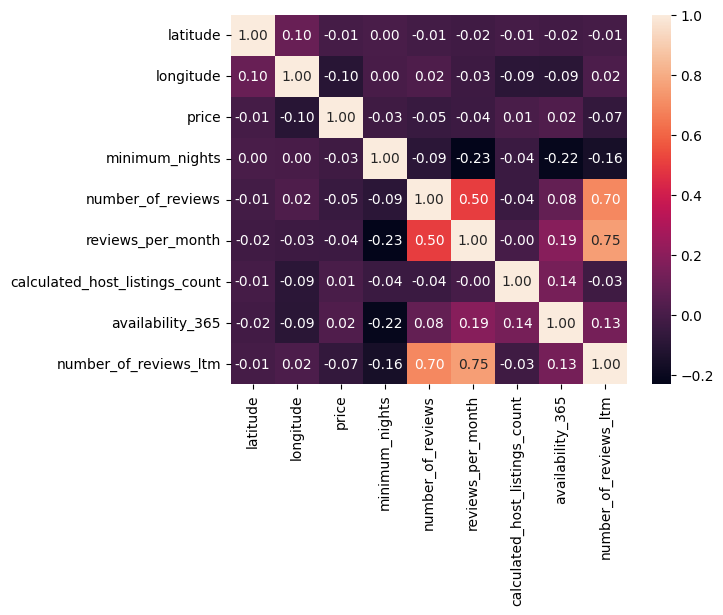

In [11]:
# plotar um heatmap a partir das correlações
sns.heatmap(matriz_corr, fmt=".2f", annot = True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [12]:
df.room_type.value_counts()

,count
room_type,
Entire home/apt,85733
Private room,8975
Hotel room,776
Shared room,401


In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

,count
room_type,
Entire home/apt,0.894123
Private room,0.093602
Hotel room,0.008093
Shared room,0.004182


Os imóveis mais alugados em Paris são o do tipo "espaço inteiro" (*entire room/apt*).

### **Q6. Qual a localidade mais cara do dataset?**



In [14]:
# ver preços por bairros, na média
df.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)

,price
neighbourhood,
Passy,522.344147
Élysée,496.991481
Palais-Bourbon,470.621886
Louvre,379.477286
Luxembourg,355.556762
Hôtel-de-Ville,318.686652
Opéra,314.446648
Batignolles-Monceau,299.601737
Temple,292.591432


O bairro mais caro de Paris é o Passy.

<Axes: xlabel='longitude', ylabel='latitude'>

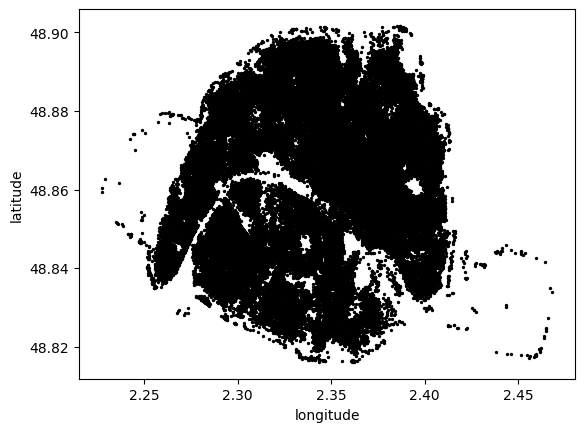

In [16]:
# plotar os imóveis pela latitude-longitude
df.plot.scatter(x="longitude", y="latitude", s=2, c="black")

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [20]:
# ver a média da coluna `minimum_nights``
print("A média do mínimo de noites para aluguel em Paris é {:.1f}.".format(df.minimum_nights.mean()))

A média do mínimo de noites para aluguel em Paris é 40.6.


De acordo com os dados, o mínimo de noites possui valor médio superior a um mês, o que parece ser bem elevado para um aluguel de temporada. Vamos analisar o *box plot* para verificar se esse parâmetro pode ter sido influenciado por *outliers*.

<Axes: >

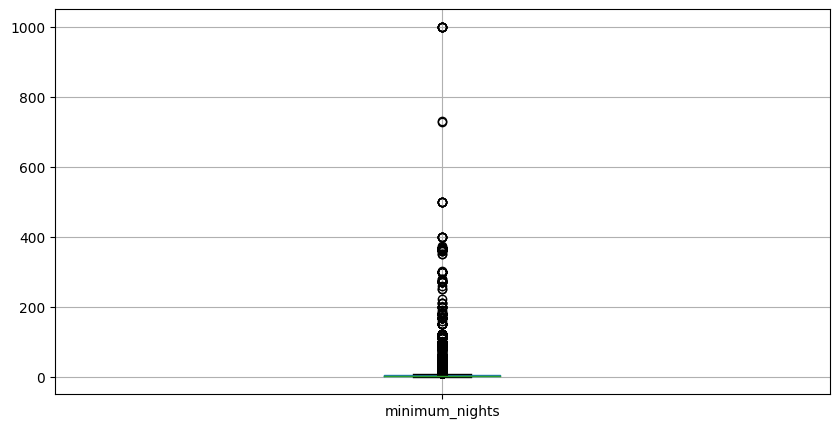

In [26]:
df.boxplot(column="minimum_nights",figsize=(10,5))

Por meio de uma inspeção visual do *box plot*, decidimos criar um novo *data frame* sem as linhas que possuem valor de `minimum_nights` acima de 6.5 e refazer o cálculo do valor médio.

2.4443907546106143

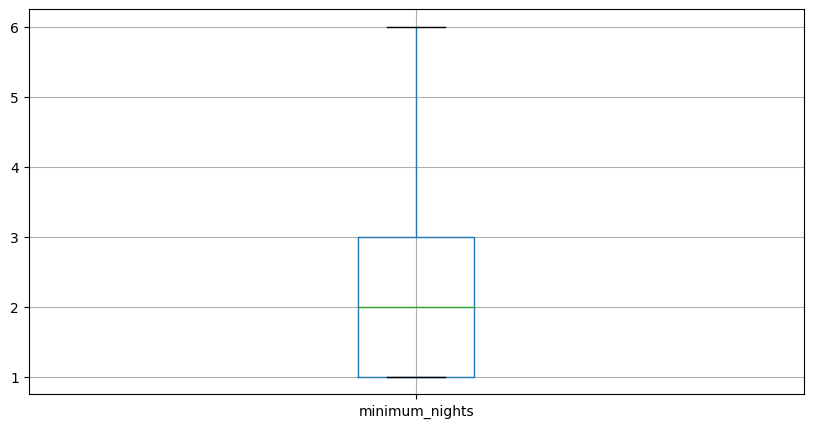

In [46]:
df_aux = df[df.minimum_nights <= 6.5]
df_aux.boxplot(column="minimum_nights",figsize=(10,5))

In [47]:
print("Após a remoção dos ouliers, a média do mínimo de noites para aluguel em Paris é {:.1f}.".format(df_aux.minimum_nights.mean()))

Após a remoção dos ouliers, a média do mínimo de noites para aluguel em Paris é 2.4.


## Conclusões


* Os dados do Airbnb para a cidade de Paris são compostos por 95.885 entradas e 18 variáveis. No entanto, como a variável `neighbourhood_group` consta como NaN em todos os casos, ela foi eliminada, resultando em 17 variáveis efetivas.
* As variáveis `reviews_per_month` e `last_review` são as que mais possuem entradas nulas, com cerca de 1/3 de entradas desse tipo.
* O preço médio da diária é de € 289,08, e os imóveis mais alugados são do tipo espaço inteiro, que representam quase 90% das reservas.
* A localidade mais cara é o bairro de Passy, que de fato é uma das regiões mais nobres de Paris, com valor médio de diária igual a € 522,34, cerca de 80% superior à média da cidade.
* Uma análise preliminar indicou que o valor médio para o número mínimo de noites exigido pelos anunciantes era de 40,6. No entanto, por se tratar de um valor elevado, optou-se por analisar o box plot da variável e eliminar os *outliers*, o que resultou em um valor médio de 2,4 noites.
